# Lesson 5. Equations and systems of equations

Finding roots (solutions) of single-variable equations and systems of multi-variable equations is one of the most classic tasks for which numerical calculations are used. The formal representation of the problem for one variable looks like this: We want to find the $x$ argument values ​​for which the value of the $f(x)$ function is equal to $0$. The analytical solution comes down to finding the explicit form of the inverse function, i.e. the function $g$ such that if $f(x) = y$ then $g(y) = x$ and then calculating $x_0 = g(0)$. In turn, the numerical solution consists in finding successive values ​​of $x_1$, $x_2$ $\ldots$ $x_n$ such that in the boundary $\lim_{i\to\infty}x_i=x_0$. Of course, we can't count forever, so we stop for $n$ large enough. In detail, let us discuss two example algorithms for finding the roots of any continuous functions (in a given interval).

## Bisection method

In the [bisection method](https://en.wikipedia.org/wiki/Bisection_method), we begin the search for a solution by selecting such limits of the interval that the values ​​of the function in these limits have opposite signs. Then we find the middle of the range and calculate the value of the function. This value can be $0$ (we found the solution and finish) or have a sign of the value in one of the range boundaries. We set the center as a new limit with the same sign and repeat the procedure until the assumed accuracy is achieved (the width of the interval is below a certain limit, a specified number of repetitions or the value of the function is below the assumed limit). The whole process is illustrated in the figure:

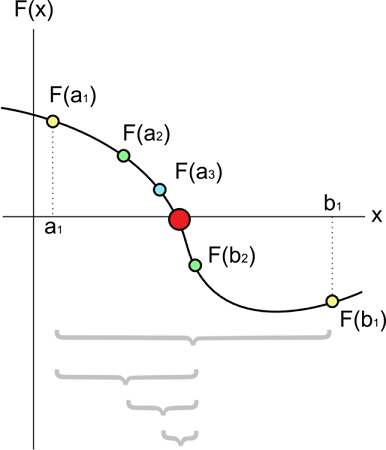

We start from the $(a_1, b_1)$ range. The function $f(a_1)$ is positive and $f(b_1)$ is negative, so the solution must lie in between. We find the middle; because the value of the function is negative, we substitute it as the right boundary of $b_2$. Then we find the middle of the new interval, which has a positive value, so we substitute $a_2$ as the left border. We find the middle again, the value in it is positive, so we substitute $a_3$ for the left border. We find the centre, the value is below the assumed accuracy, and we have found a solution.

Let's look at the implementation of this algorithm:

In [ ]:
def f(x):
  return 3*x**3+2*x**2-1

a, b = 0, 1
eps = 1e-6
while b - a > eps:
  m = (a + b)/2
  if f(m) == 0:
    break
  else:
    if f(a) * f(m) > 0:
      a=m
    else:
      b=m
print('x = {:.6f}'.format(m))

x = 0.528182


This is the same example we discussed at the beginning of Lesson One. Analyze it yourself.

This task can be solved much easier by using the `optimize` library provided in the `scipy` package with the `bisect` function:

In [ ]:
from scipy import optimize

def f(x):
  return 3*x**3+2*x**2-1

optimize.bisect(f, 0, 1)


0.5281813269484701

As we can see, the provided function found the same solution but with greater accuracy.

## Newton's method

The second frequently used algorithm for finding the root of the equation is [Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method). We start with similar assumptions: the tested function is continuous in the given range and has opposite signs at its ends. Additionally, the function should have a constant sign derivative (that is, be ascending or descending over the entire interval). We choose the starting point (usually the beginning or the end of the interval, $0$ or $1$) and find the tangent to the function at that point. The intersection of the tangent with the $x$ axis is the new (approximate) solution. If the accuracy of the solution is too low, we substitute it as the starting point and repeat the procedure. The whole procedure is illustrated in the figure below:

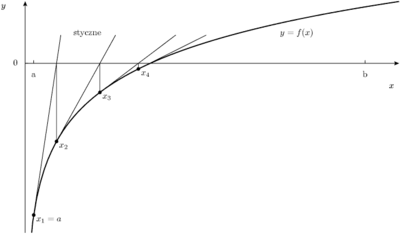

Let's implement this algorithm and calculate the derivative numerically (see details in the next lesson):

In [ ]:
def newton(f,x0,epsilon,max_iter):
  def Df(f,x):
    return (f(x+5e-7)-f(x-5e-7))/1e-6
  xn = x0
  for n in range(max_iter):
    fxn = f(xn)
    if abs(fxn) < epsilon:
      return xn
    Dfxn = Df(f,xn)
    if Dfxn == 0:
      return None
    xn = xn - fxn/Dfxn
  return None

def f(x):
  return 3*x**3+2*x**2-1

print(newton(f,1,1e-4,1000))

0.5281834031650157


Again, the task becomes much simpler if we use the `optimize` module from the `scipy` library:

In [ ]:
from scipy import optimize

def f(x):
  return 3*x**3+2*x**2-1

optimize.newton(f, 1)


0.528181326947777

## Finding the roots of a polynomial

When solving various problems, it is often necessary to find the roots of a polynomial. [Fundamental theorem of algebra](https://en.wikipedia.org/wiki/Fundamental_theorem_of_algebra) in one of its forms says that the roots of a polynomial are uniquely defined by its coefficients. So any polynomial of the form $a_n\cdot x^n+a_{n-1}\cdot x^{n-1}+\ldots+a_1\cdot x+a_0$ can be reduced to $a_n(x-x_n)(x-x_{n-1})\cdot\ldots\cdot (x-x_1)$ where $x_1$, $x_2$, $\ldots$, $x_n$ are the roots of the polynomial. In other words, for each polynomial of the degree $n\geqslant1$: $$\sum_{i=0}^{n}a_i\cdot x^i=a_n\prod_{i=1}^{n}(x-x_i)$$.
Converting one form to another is quite complicated, but once again, the `numpy` package comes in handy. If we write the polynomial as a vector of coefficients, we can use the `roots` method, which returns the vector of roots. Similarly, having a vector of roots, we can find the vector of coefficients using the `poly` method. Suppose we want to solve the equation $$x^4−11\cdot x^3+9\cdot x^2+11\cdot x−10=0$$

In [ ]:
import numpy as np

coeffs = np.array([1, -11, 9, 11, -10])

roots = np.roots(coeffs)
print(roots)

[10.+0.0000000e+00j -1.+0.0000000e+00j  1.+9.6357437e-09j
  1.-9.6357437e-09j]


We can see that the solutions are $x_1=10$, $x_2=-1$ and $x_3=x_4=1$ (the double solution is complex, but the imaginary part is so small that it is probably a consequence of the numerical inaccuracies). Let's check it:

In [ ]:
import numpy as np

roots=np.array([10, -1, 1, 1])

print(np.poly(roots))


[  1. -11.   9.  11. -10.]


## Solving a system of linear equations

We have a set of $n$ linear equations with $n$ unknowns in the form:

$$\begin{cases}
a_{11}\cdot x_1 + a_{12}\cdot x_2 + \ldots + a_{1n}\cdot x_n & = c_1 \\ 
a_{21}\cdot x_1 + a_{22}\cdot x_2 + \ldots + a_{2n}\cdot x_n & = c_2  \\ 
 \ldots \\
a_{n1}\cdot x_1 + a_{n2}\cdot x_2 + \ldots + a_{nn}\cdot x_n & = c_n 
\end{cases}$$

We can write such a system in the form of a matrix equation:

$$\begin{bmatrix}
a_{11} & a_{12} & \ldots & a_{1n}\\ 
a_{21} & a_{22} & \ldots & a_{2n}\\ 
 \ldots \\ 
a_{31} & a_{32} & \ldots & a_{3n}
\end{bmatrix}\begin{bmatrix}
x_1\\
x_2\\
\ldots \\
x_n
\end{bmatrix}=\begin{bmatrix}
c_1\\
c_2\\
\ldots \\
c_n
\end{bmatrix}$$

or in short, $AX = C$, where $A$ is the matrix of coefficients, $X$ is the solution vector and $C$ is the constants vector. For every matrix having an inverse, the $A^{-1}A=I$ holds true, so the solution to our system of equations can be found by multiplying both sides of the equation on the right by the inverse matrix of the coefficient matrix:

$$
\begin{matrix}
AX &=& C\\
A^{-1}AX &=& A^{-1}C\\
IX &=& A^{-1}C\\
X &=& A^{-1}C
\end{matrix}
$$

The `numpy` package in the` linalg` module contains both the `inv(a)` matrix inversion function and the `solve(a, c)` root finding function. Let's test their operation with an example. Let's solve a system of two equations with two unknowns:

$$\begin{cases}
 x &+& 2y &=& 1 \\ 
 3x &+& 5 y &=& 2
\end{cases}
$$

using both methods:

In [ ]:
import numpy as np

A = np.array([[1, 2],[3, 5]])
C = np.array([1, 2])

# znajdowanie pierwiastków przez odwracanie macierzy A
invA= np.linalg.inv(A)
X=np.dot(invA,C)
print(X)
print()

# znajdowanie pierwiastków wbudowaną funkcją solve()
print(np.linalg.solve(A,C))

[-1.  1.]

[-1.  1.]


We can test the correctness of the solutions by substituting them to the original equation:

In [ ]:
np.allclose(np.dot(A, X), C)

True

Of course, the above is only a short invitation to read the documentation for the modules [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html) and [numpy.linalg](https://numpy.org/doc/stable/reference/routines.linalg.html) and to test the examples provided there.